In [187]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import rand
from numpy.random import randint
from numpy.random import seed
from matplotlib import pyplot
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

def objective(series):
    trace_len = 0
    for i in range(len(series) - 1):
        p1 = series[i]
        p2 = series[i+1]
        trace_len += math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    return trace_len

def annealing_scheme099(temp):
    return temp * 0.99

def change_random_places(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = randint(0, len(series)-1)
    series[to_change1], series[to_change2] = series[to_change2], series[to_change1]
    return series
# (series, temperature, energy_function, annealing_scheme, conversion_scheme, max_iterations_no, iterations_no, animation)
def simulated_annealing(series, temperature, energy_function, annealing_scheme, conversion_scheme, max_iterations_no, iterations_no, animation):
    np.seterr(over='ignore')
    
    best = copy.deepcopy(series)
    best_eval = energy_function(copy.deepcopy(best))
    curr = copy.deepcopy(best)
    curr_eval = best_eval
    scores = list()
    
    animation_frames = []
    
    k = 0
    while temp > 0.0000000000001 and k < max_iterations_no:
        k+=1
        
        temperature = annealing_scheme(temperature)
        
        
        for i in range(iterations_no):
            
            candidate = conversion_scheme(curr)
            candidate_eval = energy_function(candidate)
            
            if candidate_eval < best_eval:
                best = copy.deepcopy(candidate)
                best_eval = candidate_eval
                if animation:
                    animation_frames.append(best)
                
            diff = candidate_eval - curr_eval
            met = exp(-diff / temperature)
            
            if diff < 0 or rand() < met:
                scores.append(candidate_eval)
                curr = candidate
                curr_eval = candidate_eval
            
    if animation:
        return (best, best_eval, scores, animation_frames)
    return (best, best_eval, scores)

In [188]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import rand
from numpy.random import randint
from numpy.random import seed
from matplotlib import pyplot
import math
import numpy as np
import matplotlib.pyplot as plt

def objective(series):
    trace_len = 0
    for i in range(len(series) - 1):
        p1 = series[i]
        p2 = series[i+1]
        trace_len += math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    return trace_len

def annealing_scheme099(temp):
    return temp * 0.99

def change_random_places(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = randint(0, len(series)-1)
    series[to_change1], series[to_change2] = series[to_change2], series[to_change1]
    return series
# (series, temperature, energy_function, annealing_scheme, conversion_scheme, max_iterations_no, iterations_no, animation)
def simulated_annealing(series, temperature, energy_function, annealing_scheme, conversion_scheme, max_iterations_no, iterations_no, animation):
    np.seterr(over='ignore')
    
    best = series
    best_eval = energy_function(best)
    curr, curr_eval = best, best_eval
    scores = list()
    
    animation_frames = []
    
    k = 0
    while temp > 0.0000000000001 and k < max_iterations_no:
        k+=1
        
        temperature = annealing_scheme(temperature)
        
        
        for i in range(iterations_no):
            
            candidate = conversion_scheme(curr.copy())
            candidate_eval = energy_function(candidate)
            
            if candidate_eval < best_eval:
                best, best_eval = candidate, candidate_eval
                if animation:
                    animation_frames.append(curr)
                
            diff = candidate_eval - curr_eval
            met = exp(-diff / temperature)
            
            if diff < 0 or rand() < met:
                scores.append(candidate_eval)
                curr, curr_eval = candidate, candidate_eval
                
    if animation:
        return [best, best_eval, scores, animation_frames]
    return [best, best_eval, scores]

Done!
f([(75, 5), (86, 13), (76, 26), (79, 64), (63, 61), (72, 30), (70, 21), (72, 9), (71, 3), (37, 12), (50, 20), (76, 71), (87, 87), (94, 96), (49, 57), (11, 28), (6, 25), (9, 7), (1, 0), (16, 1), (29, 14), (24, 43), (13, 47), (3, 68), (8, 88), (18, 84), (22, 57), (50, 68), (60, 81), (52, 80)]) = 635.742939


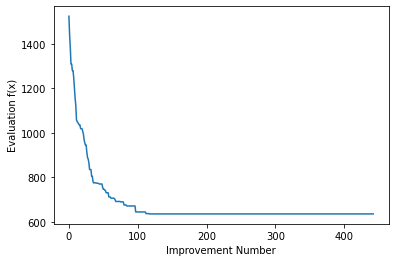

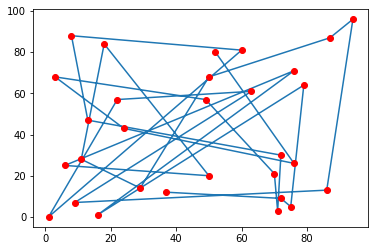

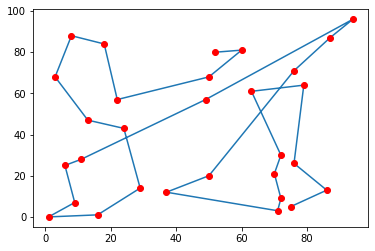

In [189]:
seed(1)

# plt.figure(figsize=(10,10))


vector = []
elements_no = 30

for i in range(elements_no):
    vector.append((randint(0, 100), randint(0,100)))

bounds = asarray([[-5.0, 5.0]])
n_iterations = 10 #in each temperature
temp = 1

# (series, temperature, energy_function, annealing_scheme, conversion_scheme, max_iterations_no, iterations_no, animation)


best, score, scores, animation_frames = simulated_annealing(vector, temp, objective, annealing_scheme099, change_random_places, 1000, n_iterations, True)
print('Done!')
print('f(%s) = %f' % (best, score))

pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()



x = [i[0] for i in vector]
y = [i[1] for i in vector]

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

x = [i[0] for i in best]
y = [i[1] for i in best]

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

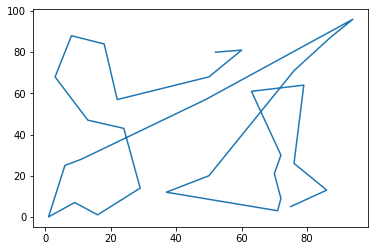

In [190]:

from matplotlib import animation,rc

fig, ax = plt.subplots()

x = np.array(animation_frames[0])[:,0]
line, = ax.plot(x, np.array(animation_frames[i])[:,1])


def animate(i):
    line.set_xdata(np.array(animation_frames[i])[:,0])
    line.set_ydata(np.array(animation_frames[i])[:,1])  # update the data.
    return line,

anim = animation.FuncAnimation(
    fig, animate, frames=len(animation_frames), interval=100, blit=True)

rc('animation', html='html5')
anim


Done!
f([(443, 253), (443, 268), (429, 293), (291, 231), (276, 225), (282, 225), (488, 443), (498, 466), (495, 442), (491, 286), (482, 205), (489, 224), (475, 268), (440, 290), (464, 267), (237, 293), (249, 271), (259, 299), (203, 403), (42, 401), (77, 417), (1, 212), (7, 253), (47, 289), (45, 291), (51, 294), (221, 55), (235, 0), (401, 16), (459, 12), (464, 30), (427, 10), (407, 97), (99, 402), (67, 489), (43, 489), (63, 483), (92, 471), (87, 408), (227, 295), (250, 295), (438, 428), (419, 407), (219, 219), (203, 227), (202, 417), (255, 465), (237, 471), (220, 461), (55, 63), (45, 14), (44, 7), (91, 37), (208, 94), (283, 64), (272, 233), (244, 231), (236, 215), (31, 91), (72, 29), (76, 29), (229, 48), (213, 49), (220, 71), (210, 48), (404, 31), (444, 34), (422, 36), (429, 67), (408, 85), (422, 221), (455, 208), (296, 220), (235, 207), (95, 282), (78, 244), (222, 77), (227, 93), (227, 70), (81, 293), (33, 418), (60, 422), (50, 462), (19, 493), (55, 472), (57, 461), (53, 462), (36, 463)

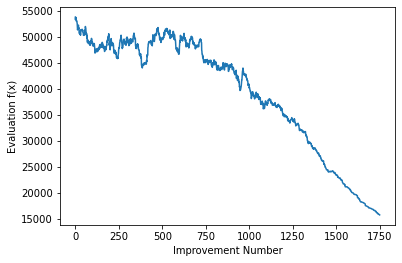

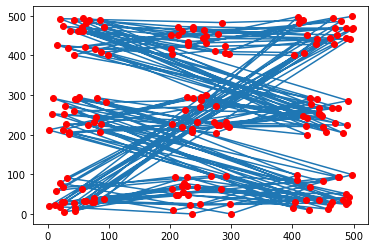

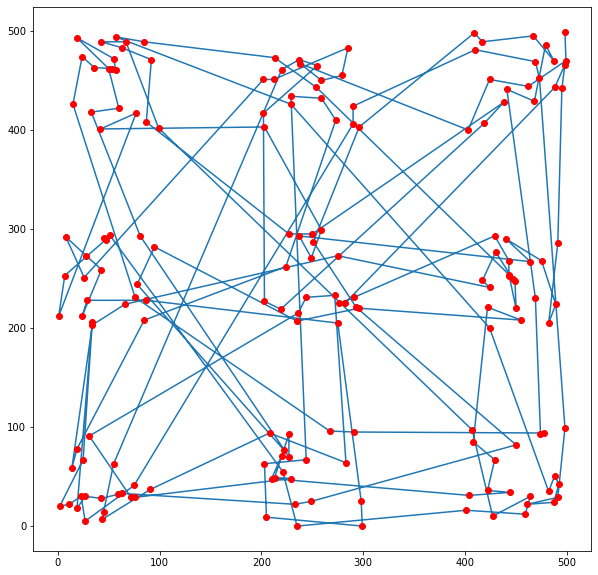

In [191]:
vector = []
elements_no = 180

for i in range(20):
    vector.append((randint(0, 100), randint(0,100)))
    vector.append((randint(200, 300), randint(0,100)))
    vector.append((randint(400, 500), randint(0,100)))
    vector.append((randint(0, 100), randint(200,300)))
    vector.append((randint(200, 300), randint(200,300)))
    vector.append((randint(400, 500), randint(200,300)))
    vector.append((randint(0, 100), randint(400,500)))
    vector.append((randint(200, 300), randint(400,500)))
    vector.append((randint(400, 500), randint(400,500)))

bounds = asarray([[-5.0, 5.0]])
n_iterations = 10 #in each temperature
temp = 1000
best, score, scores = simulated_annealing(vector, temp, objective, annealing_scheme099, change_random_places, 1000, n_iterations, False)
print('Done!')
print('f(%s) = %f' % (best, score))

pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()



x = [i[0] for i in vector]
y = [i[1] for i in vector]

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

x = [i[0] for i in best]
y = [i[1] for i in best]

plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

Done!
f([(4.569509809862839, 15.011919040693906), (-0.8633747019321873, 13.38576254103388), (-2.141146565690158, 11.44429211505136), (-5.887820673903378, 6.198707595525232), (-5.713605327063917, 2.576848880709164), (-3.353512533454579, -4.906212846174468), (-3.2396732579690712, -4.071655682483794), (-1.6079183111025714, 1.280626550674767), (-0.7812362166276114, 2.9682979319564557), (3.0505697540040835, 2.9073176081963354), (2.3485019897662567, 7.427067884277278), (2.1374486766988037, 12.095490650622892), (4.432936760130788, 11.494602681443943), (4.37040833108477, 11.01681176832349), (10.984805890941502, 4.182665481631328), (14.002920929570559, 4.493059811689543), (21.767237879170736, 1.2809741631398166), (13.722555436764337, -2.9455171744984643), (8.037713719650826, -0.06518872491247493), (6.136335517774771, -1.2003565823052906), (5.844299123443706, -4.4650329161890205), (8.86268999520857, -5.63688337148326), (5.030528105598423, -6.795569104450713), (0.15264218690360729, -7.55643173887

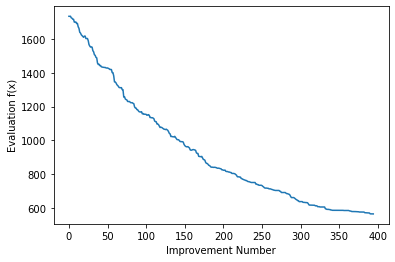

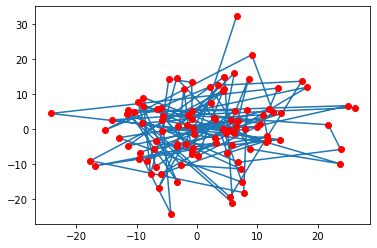

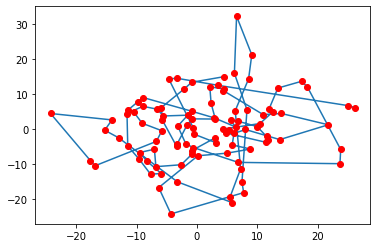

In [192]:
elements_no = 100

matrix = np.random.normal([0, 0], [10, 10], (elements_no, 2))


vector = [(x, y) for x, y in matrix]

bounds = asarray([[-5.0, 5.0]])
n_iterations = 10 #in each temperature
temp = 2
best, score, scores = simulated_annealing(vector, temp, objective, annealing_scheme099, change_random_places, 1000, n_iterations, False)
print('Done!')
print('f(%s) = %f' % (best, score))

pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()



x = [i[0] for i in vector]
y = [i[1] for i in vector]

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

x = [i[0] for i in best]
y = [i[1] for i in best]

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.show()

# Zadanie 2

In [50]:
from matplotlib.pyplot import imshow


In [51]:
def generate_image(n, delta):
    return [0 if rand() < delta else 1 for _ in range(n*n)]

In [52]:
def generate_image2d(n, delta):
    return [[0 if rand() < delta else 1 for _ in range(n)] for i in range(n)]

In [53]:
def energy_func1(series):
    energy = 0
    for i in range(len(series)-1):
        if series[i] == series[i+1]:
            energy += 1
    return energy

In [54]:
def energy_func2(series):
    energy = 0
    width = int(np.sqrt(len(series)))
    for i in range(len(series)):
        row = i / width
        col = i % width
        energy += series[i] * (abs(row - 0.5*width) + abs(col - 0.5*width))
    return energy

In [55]:
def random_swap2d(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = randint(0, len(series)-1)
    to_change3 = randint(0, len(series)-1)
    to_change4 = randint(0, len(series)-1)
    while series[to_change1][to_change2] == series[to_change3][to_change4]:
        to_change1 = randint(0, len(series)-1)
        to_change2 = randint(0, len(series)-1)
        to_change3 = randint(0, len(series)-1)
        to_change4 = randint(0, len(series)-1)
    series[to_change1][to_change2], series[to_change3][to_change4] = series[to_change3][to_change4], series[to_change1][to_change2]
    return series

In [123]:
def arbitrary_swap2d(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = randint(0, len(series)-1)
    to_change3 = to_change1 + 1
    while series[to_change1][to_change2] == series[to_change3][to_change2]:
        to_change1 = randint(0, len(series)-1)
        to_change2 = randint(0, len(series)-1)
        to_change3 = to_change1 + 1
    series[to_change1][to_change2], series[to_change3][to_change2] = series[to_change3][to_change2], series[to_change1][to_change2]
    return series

In [201]:
def random_row_or_col_swap(series):
    to_change = randint(0, len(series)-1)
    what = randint(0, 1)
    if what == 0:
        series[to_change], series[to_change+1] = series[to_change+1], series[to_change]
    else:
        series[:, to_change], series[:, to_change+1] = series[:, to_change+1],series[:, to_change]
    return series

In [57]:
def energy_func3(series):
    energy = 0
    tmp = np.reshape(series, (int(np.sqrt(len(series))), int(np.sqrt(len(series)))))
    width = int(np.sqrt(len(series)))

    for i in range(len(tmp)):
        for j in range(len(tmp[i])):
            if i - 1 >= 0:
                energy -= tmp[i-1][j]
                if j - 1 >= 0:
                    energy -= tmp[i-1][j-1]
                if j + 1 < width:
                    energy -= tmp[i-1][j+1]
            if i + 1 < width:
                energy -= tmp[i+1][j]
                if j - 1 >= 0:
                    energy -= tmp[i+1][j-1]
                if j + 1< width:
                    energy -= tmp[i+1][j+1]
            if j - 1 >= 0:
                energy -= tmp[i][j-1]
            if j + 1 < width:
                energy -= tmp[i][j+1]
                
                
            if i - 2 >= 0:
                energy += tmp[i-2][j]
                if j - 2 >= 0:
                    energy += tmp[i-2][j-2]
                if j + 2 < width:
                    energy += tmp[i-2][j+2]
            if i + 2 < width:
                energy += tmp[i+2][j]
                if j - 2 >= 0:
                    energy += tmp[i+2][j-2]
                if j + 2 < width:
                    energy += tmp[i+2][j+2]
            if j - 2 >= 0:
                energy += tmp[i][j-2]
            if j + 2 < width:
                energy += tmp[i][j+2]
            
        
        
    return energy

In [58]:
def energy_func4(series):
    width = len(series)
    energy = 0
    for i in range(2, width - 2):
        for j in range(2, width - 2):
            energy += series[i-2][j-2] + series[i-2][j] + series[i-2][j+2] + series[i][j-2] + series[i][j+2] + series[i+2][j-2] + series[i+2][j] + series[i+2][j+2]
            energy -= series[i-1][j-1] - series[i-1][j] - series[i-1][j+1] - series[i][j-1] - series[i][j+1] - series[i+1][j-1] - series[i+1][j] - series[j+1][j+1]
    return energy

In [141]:
def energy_func5(series):
    width = len(series)
    energy = 0
    for i in range(2, width-2):
        for j in range(0, width):
            energy += series[i-1][j] + series[i+1][j]
            energy -= series[i-2][j] - series[i+2][j]
    return energy

In [147]:
def energy_func6(series):
    width = len(series)
    energy = 0
    for i in range(0, width):
        for j in range(0, width):
            energy += series[i][j] * (i + j)
    return energy

In [135]:
N = 100
DELTA = 0.3
image = generate_image(N, DELTA)

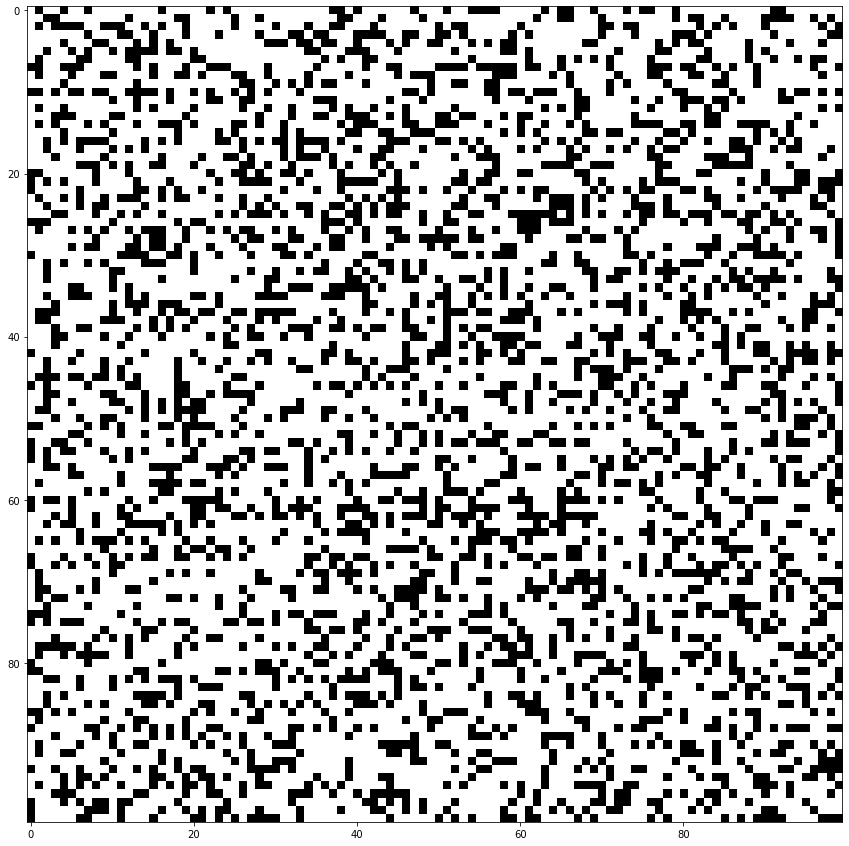

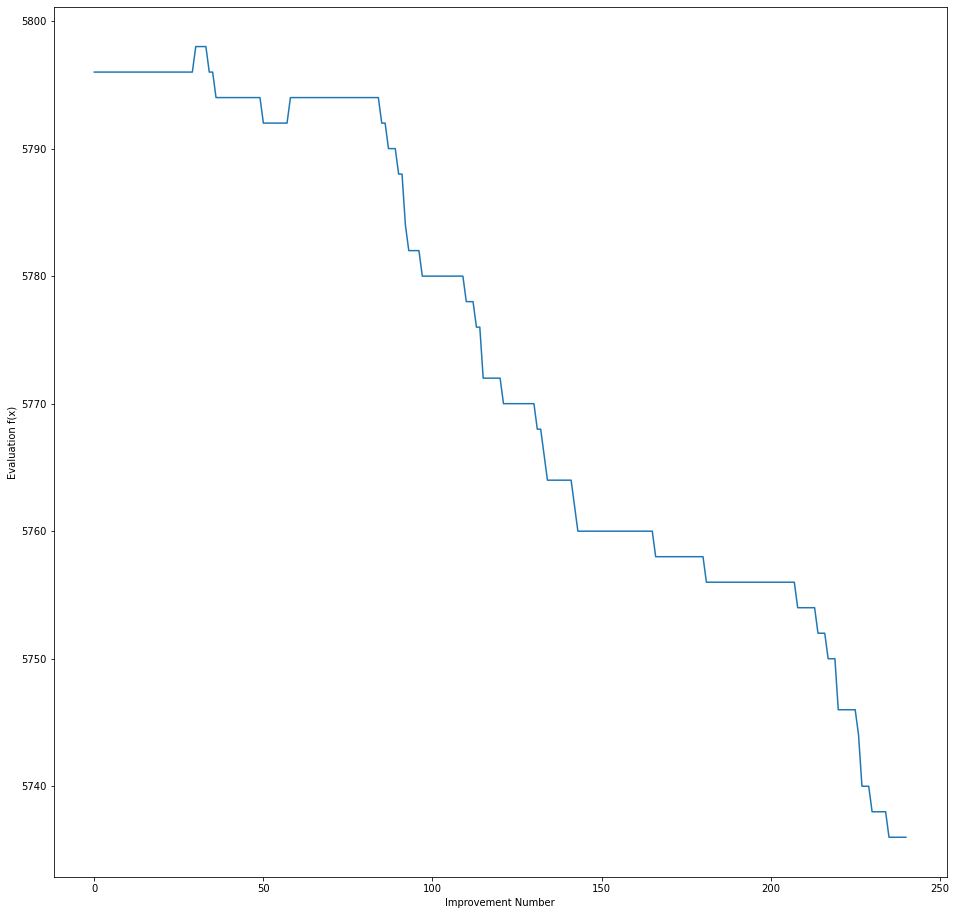

In [137]:
best, score, scores = simulated_annealing(image, temp, energy_func1, annealing_scheme099, change_random_places, 1000, 10, False)
best = np.reshape(best, (int(np.sqrt(len(best))), int(np.sqrt(len(best)))))
plt.figure(figsize=(15,15))
imshow(best, cmap='gray')

plt.figure(figsize=(16,16))
pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

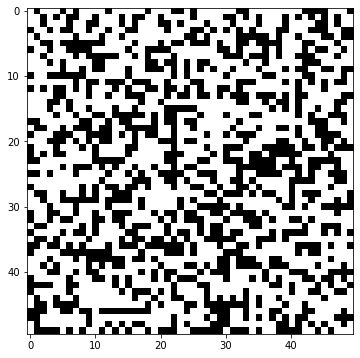

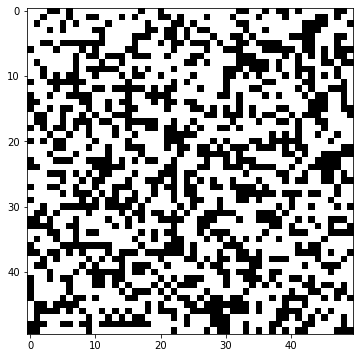

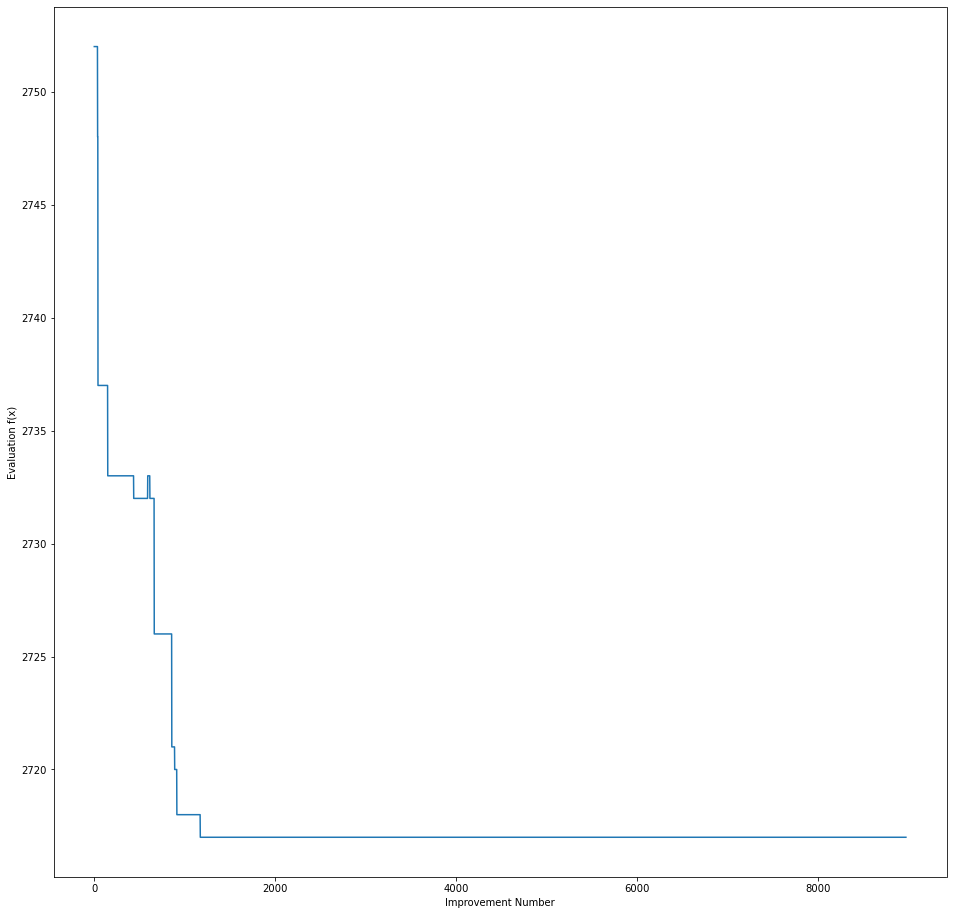

In [207]:
N = 50
DELTA = 0.4
image = generate_image2d(N, DELTA)
plt.figure(figsize=(6,6))
imshow(image, cmap='gray')

best, score, scores, animation_frames = simulated_annealing(image, 1, energy_func5, annealing_scheme099, random_row_or_col_swap, 1000, 10, True)
# best = np.reshape(best, (int(np.sqrt(len(best))), int(np.sqrt(len(best)))))
plt.figure(figsize=(6,6))
imshow(best, cmap='gray')


plt.figure(figsize=(16,16))
pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

In [21]:
best, score, scores = simulated_annealing(image, temp, energy_func2, annealing_scheme099, change_random_places, 1000, n_iterations, False)
best = np.reshape(best, (int(np.sqrt(len(best))), int(np.sqrt(len(best)))))
plt.figure(figsize=(15,15))
imshow(best, cmap='gray')

TypeError: can't multiply sequence by non-int of type 'float'

# Zadanie 3

In [204]:
sudoku_set = [[0,0,3,0,2,0,6,0,0,9,0,0,3,0,5,0,0,1,0,0,1,8,0,6,4,0,0,0,0,8,1,0,2,9,0,0,7,0,0,0,0,0,0,0,8,0,0,6,7,0,8,2,0,0,0,0,2,6,0,9,5,0,0,8,0,0,2,0,3,0,0,9,0,0,5,0,1,0,3,0,0], 
[2,0,0,0,8,0,3,0,0,0,6,0,0,7,0,0,8,4,0,3,0,5,0,0,2,0,9,0,0,0,1,0,5,4,0,8,0,0,0,0,0,0,0,0,0,4,0,2,7,0,6,0,0,0,3,0,1,0,0,7,0,4,0,7,2,0,0,4,0,0,6,0,0,0,4,0,1,0,0,0,3], 
[0,0,0,0,0,0,9,0,7,0,0,0,4,2,0,1,8,0,0,0,0,7,0,5,0,2,6,1,0,0,9,0,4,0,0,0,0,5,0,0,0,0,0,4,0,0,0,0,5,0,7,0,0,9,9,2,0,1,0,8,0,0,0,0,3,4,0,5,9,0,0,0,5,0,7,0,0,0,0,0,0], 
[0,3,0,0,5,0,0,4,0,0,0,8,0,1,0,5,0,0,4,6,0,0,0,0,0,1,2,0,7,0,5,0,2,0,8,0,0,0,0,6,0,3,0,0,0,0,4,0,1,0,9,0,3,0,2,5,0,0,0,0,0,9,8,0,0,1,0,2,0,6,0,0,0,8,0,0,6,0,0,2,0], 
[0,2,0,8,1,0,7,4,0,7,0,0,0,0,3,1,0,0,0,9,0,0,0,2,8,0,5,0,0,9,0,4,0,0,8,7,4,0,0,2,0,8,0,0,3,1,6,0,0,3,0,2,0,0,3,0,2,7,0,0,0,6,0,0,0,5,6,0,0,0,0,8,0,7,6,0,5,1,0,9,0], 
[1,0,0,9,2,0,0,0,0,5,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,5,0,0,0,8,1,0,2,0,0,0,0,0,0,0,0,0,4,0,2,7,0,0,0,9,0,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,9,4,5,0,0,0,0,7,1,0,0,6], 
[0,4,3,0,8,0,2,5,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,4,9,0,0,0,0,4,0,7,0,0,0,0,6,0,8,0,0,0,0,1,0,2,0,0,0,0,3,8,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,3,4,0,9,0,7,1,0], 
[4,8,0,0,0,6,9,0,2,0,0,2,0,0,8,0,0,1,9,0,0,3,7,0,0,6,0,8,4,0,0,1,0,2,0,0,0,0,3,7,0,4,1,0,0,0,0,1,0,6,0,0,4,9,0,2,0,0,8,5,0,0,7,7,0,0,9,0,0,6,0,0,6,0,9,2,0,0,0,1,8], 
[0,0,0,9,0,0,0,0,2,0,5,0,1,2,3,4,0,0,0,3,0,0,0,0,1,6,0,9,0,8,0,0,0,0,0,0,0,7,0,0,0,0,0,9,0,0,0,0,0,0,0,2,0,5,0,9,1,0,0,0,0,5,0,0,0,7,4,3,9,0,2,0,4,0,0,0,0,7,0,0,0], 
[0,0,1,9,0,0,0,0,3,9,0,0,7,0,0,1,6,0,0,3,0,0,0,5,0,0,7,0,5,0,0,0,0,0,0,9,0,0,4,3,0,2,6,0,0,2,0,0,0,0,0,0,7,0,6,0,0,1,0,0,0,3,0,0,4,2,0,0,7,0,0,6,5,0,0,0,0,6,8,0,0], 
[0,0,0,1,2,5,4,0,0,0,0,8,4,0,0,0,0,0,4,2,0,8,0,0,0,0,0,0,3,0,0,0,0,0,9,5,0,6,0,9,0,2,0,1,0,5,1,0,0,0,0,0,6,0,0,0,0,0,0,3,0,4,9,0,0,0,0,0,7,2,0,0,0,0,1,2,9,8,0,0,0], 
[0,6,2,3,4,0,7,5,0,1,0,0,0,0,5,6,0,0,5,7,0,0,0,0,0,4,0,0,0,0,0,9,4,8,0,0,4,0,0,0,0,0,0,0,6,0,0,5,8,3,0,0,0,0,0,3,0,0,0,0,0,9,1,0,0,6,4,0,0,0,0,7,0,5,9,0,8,3,2,6,0], 
[3,0,0,0,0,0,0,0,0,0,0,5,0,0,9,0,0,0,2,0,0,5,0,4,0,0,0,0,2,0,0,0,0,7,0,0,1,6,0,0,0,0,0,5,8,7,0,4,3,1,0,6,0,0,0,0,0,8,9,0,1,0,0,0,0,0,0,6,7,0,8,0,0,0,0,0,0,5,4,3,7], 
[6,3,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,8,0,0,5,6,7,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,1,0,2,0,0,0,0,0,0,0,3,4,5,0,0,0,0,0,7,0,0,4,0,8,0,3,0,0,9,0,2,9,4,7,1,0,0,0,8,0], 
[0,0,0,0,2,0,0,4,0,0,0,8,0,3,5,0,0,0,0,0,0,0,7,0,6,0,2,0,3,1,0,4,6,9,7,0,2,0,0,0,0,0,0,0,0,0,0,0,5,0,1,2,0,3,0,4,9,0,0,0,7,3,0,0,0,0,0,0,0,0,1,0,8,0,0,0,0,4,0,0,0], 
[3,6,1,0,2,5,9,0,0,0,8,0,9,6,0,0,1,0,4,0,0,0,0,0,0,5,7,0,0,8,0,0,0,4,7,1,0,0,0,6,0,3,0,0,0,2,5,9,0,0,0,8,0,0,7,4,0,0,0,0,0,0,5,0,2,0,0,1,8,0,6,0,0,0,5,4,7,0,3,2,9], 
[0,5,0,8,0,7,0,2,0,6,0,0,0,1,0,0,9,0,7,0,2,5,4,0,0,0,6,0,7,0,0,2,0,3,0,1,5,0,4,0,0,0,9,0,8,1,0,3,0,8,0,0,7,0,9,0,0,0,7,6,2,0,5,0,6,0,0,9,0,0,0,3,0,8,0,1,0,3,0,4,0], 
[0,8,0,0,0,5,0,0,0,0,0,0,0,0,3,4,5,7,0,0,0,0,7,0,8,0,9,0,6,0,4,0,0,9,0,3,0,0,7,0,1,0,5,0,0,4,0,8,0,0,7,0,2,0,9,0,1,0,2,0,0,0,0,8,4,2,3,0,0,0,0,0,0,0,0,1,0,0,0,8,0], 
[0,0,3,5,0,2,9,0,0,0,0,0,0,4,0,0,0,0,1,0,6,0,0,0,3,0,5,9,0,0,2,5,1,0,0,8,0,7,0,4,0,8,0,3,0,8,0,0,7,6,3,0,0,1,3,0,8,0,0,0,1,0,4,0,0,0,0,2,0,0,0,0,0,0,5,1,0,4,8,0,0], 
[0,0,0,0,0,0,0,0,0,0,0,9,8,0,5,1,0,0,0,5,1,9,0,7,4,2,0,2,9,0,4,0,1,0,6,5,0,0,0,0,0,0,0,0,0,1,4,0,5,0,8,0,9,3,0,2,6,7,0,9,5,8,0,0,0,5,1,0,3,6,0,0,0,0,0,0,0,0,0,0,0], 
[0,2,0,0,3,0,0,9,0,0,0,0,9,0,7,0,0,0,9,0,0,2,0,8,0,0,5,0,0,4,8,0,6,5,0,0,6,0,7,0,0,0,2,0,8,0,0,3,1,0,2,9,0,0,8,0,0,6,0,5,0,0,7,0,0,0,3,0,9,0,0,0,0,3,0,0,2,0,0,5,0], 
[0,0,5,0,0,0,0,0,6,0,7,0,0,0,9,0,2,0,0,0,0,5,0,0,1,0,7,8,0,4,1,5,0,0,0,0,0,0,0,8,0,3,0,0,0,0,0,0,0,9,2,8,0,5,9,0,7,0,0,6,0,0,0,0,3,0,4,0,0,0,1,0,2,0,0,0,0,0,6,0,0], 
[0,4,0,0,0,0,0,5,0,0,0,1,9,4,3,6,0,0,0,0,9,0,0,0,3,0,0,6,0,0,0,5,0,0,0,2,1,0,3,0,0,0,5,0,6,8,0,0,0,2,0,0,0,7,0,0,5,0,0,0,2,0,0,0,0,2,4,3,6,7,0,0,0,3,0,0,0,0,0,4,0], 
[0,0,4,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,3,9,0,7,0,0,0,8,0,4,0,0,0,0,9,0,0,1,2,0,9,8,0,1,3,0,7,6,0,0,2,0,0,0,0,8,0,1,0,0,0,8,0,5,3,9,0,0,0,4,0,0,0,0,0,0,0,0,0,0,8,0,0], 
[3,6,0,0,2,0,0,8,9,0,0,0,3,6,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,3,0,0,0,6,0,2,4,0,0,6,0,3,0,0,7,6,0,7,0,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,0,0,4,1,8,0,0,0,9,7,0,0,3,0,0,1,4], 
[5,0,0,4,0,0,0,6,0,0,0,9,0,0,0,8,0,0,6,4,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,8,0,0,0,5,0,1,7,0,0,5,0,0,0,0,0,0,0,0,0,9,0,0,8,4,0,0,3,0,0,0,6,0,0,0,6,0,0,0,3,0,0,2], 
[0,0,7,2,5,6,4,0,0,4,0,0,0,0,0,0,0,5,0,1,0,0,3,0,0,6,0,0,0,0,5,0,8,0,0,0,0,0,8,0,6,0,2,0,0,0,0,0,1,0,7,0,0,0,0,3,0,0,7,0,0,9,0,2,0,0,0,0,0,0,0,4,0,0,6,3,1,2,7,0,0], 
[0,0,0,0,0,0,0,0,0,0,7,9,0,5,0,1,8,0,8,0,0,0,0,0,0,0,7,0,0,7,3,0,6,8,0,0,4,5,0,7,0,8,0,9,6,0,0,3,5,0,2,7,0,0,7,0,0,0,0,0,0,0,5,0,1,6,0,3,0,4,2,0,0,0,0,0,0,0,0,0,0], 
[0,3,0,0,0,0,0,8,0,0,0,9,0,0,0,5,0,0,0,0,7,5,0,9,2,0,0,7,0,0,1,0,5,0,0,8,0,2,0,0,9,0,0,3,0,9,0,0,4,0,2,0,0,1,0,0,4,2,0,7,1,0,0,0,0,2,0,0,0,8,0,0,0,7,0,0,0,0,0,9,0], 
[2,0,0,1,7,0,6,0,3,0,5,0,0,0,0,1,0,0,0,0,0,0,0,6,0,7,9,0,0,0,0,4,0,7,0,0,0,0,0,8,0,1,0,0,0,0,0,9,0,5,0,0,0,0,3,1,0,4,0,0,0,0,0,0,0,5,0,0,0,0,6,0,9,0,6,0,3,7,0,0,2], 
[0,0,0,0,0,0,0,8,0,8,0,0,7,0,1,0,4,0,0,4,0,0,2,0,0,3,0,3,7,4,0,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,3,2,1,0,1,0,0,6,0,0,5,0,0,5,0,8,0,2,0,0,6,0,8,0,0,0,0,0,0,0], 
[0,0,0,0,0,0,0,8,5,0,0,0,2,1,0,0,0,9,9,6,0,0,8,0,1,0,0,5,0,0,8,0,0,0,1,6,0,0,0,0,0,0,0,0,0,8,9,0,0,0,6,0,0,7,0,0,9,0,7,0,0,5,2,3,0,0,0,5,4,0,0,0,4,8,0,0,0,0,0,0,0], 
[6,0,8,0,7,0,5,0,2,0,5,0,6,0,8,0,7,0,0,0,2,0,0,0,3,0,0,5,0,0,0,9,0,0,0,6,0,4,0,3,0,2,0,5,0,8,0,0,0,5,0,0,0,3,0,0,5,0,0,0,2,0,0,0,1,0,7,0,4,0,9,0,4,0,9,0,6,0,7,0,1], 
[0,5,0,0,1,0,0,4,0,1,0,7,0,0,0,6,0,2,0,0,0,9,0,5,0,0,0,2,0,8,0,3,0,5,0,1,0,4,0,0,7,0,0,2,0,9,0,1,0,8,0,4,0,6,0,0,0,4,0,1,0,0,0,3,0,4,0,0,0,7,0,9,0,2,0,0,6,0,0,1,0], 
[0,5,3,0,0,0,7,9,0,0,0,9,7,5,3,4,0,0,1,0,0,0,0,0,0,0,2,0,9,0,0,8,0,0,1,0,0,0,0,9,0,7,0,0,0,0,8,0,0,3,0,0,7,0,5,0,0,0,0,0,0,0,3,0,0,7,6,4,1,2,0,0,0,6,1,0,0,0,9,4,0], 
[0,0,6,0,8,0,3,0,0,0,4,9,0,7,0,2,5,0,0,0,0,4,0,5,0,0,0,6,0,0,3,1,7,0,0,4,0,0,7,0,0,0,8,0,0,1,0,0,8,2,6,0,0,9,0,0,0,7,0,2,0,0,0,0,7,5,0,4,0,1,9,0,0,0,3,0,9,0,6,0,0], 
[0,0,5,0,8,0,7,0,0,7,0,0,2,0,4,0,0,5,3,2,0,0,0,0,0,8,4,0,6,0,1,0,5,0,4,0,0,0,8,0,0,0,5,0,0,0,7,0,8,0,3,0,1,0,4,5,0,0,0,0,0,9,1,6,0,0,5,0,8,0,0,7,0,0,3,0,1,0,6,0,0], 
[0,0,0,9,0,0,8,0,0,1,2,8,0,0,6,4,0,0,0,7,0,8,0,0,0,6,0,8,0,0,4,3,0,0,0,7,5,0,0,0,0,0,0,0,9,6,0,0,0,7,9,0,0,8,0,9,0,0,0,4,0,1,0,0,0,3,6,0,0,2,8,4,0,0,1,0,0,7,0,0,0], 
[0,0,0,0,8,0,0,0,0,2,7,0,0,0,0,0,5,4,0,9,5,0,0,0,8,1,0,0,0,9,8,0,6,4,0,0,0,2,0,4,0,3,0,6,0,0,0,6,9,0,5,1,0,0,0,1,7,0,0,0,6,2,0,4,6,0,0,0,0,0,3,8,0,0,0,0,9,0,0,0,0], 
[0,0,0,6,0,2,0,0,0,4,0,0,0,5,0,0,0,1,0,8,5,0,1,0,6,2,0,0,3,8,2,0,6,7,1,0,0,0,0,0,0,0,0,0,0,0,1,9,4,0,7,3,5,0,0,2,6,0,4,0,5,3,0,9,0,0,0,2,0,0,0,7,0,0,0,8,0,9,0,0,0], 
[0,0,0,9,0,0,0,0,2,0,5,0,1,2,3,4,0,0,0,3,0,0,0,0,1,6,0,9,0,8,0,0,0,0,0,0,0,7,0,0,0,0,0,9,0,0,0,0,0,0,0,2,0,5,0,9,1,0,0,0,0,5,0,0,0,7,4,3,9,0,2,0,4,0,0,0,0,7,0,0,0], 
[3,8,0,0,0,0,0,0,0,0,0,0,4,0,0,7,8,5,0,0,9,0,2,0,3,0,0,0,6,0,0,9,0,0,0,0,8,0,0,3,0,2,0,0,9,0,0,0,0,4,0,0,7,0,0,0,1,0,7,0,5,0,0,4,9,5,0,0,6,0,0,0,0,0,0,0,0,0,0,9,2], 
[0,0,0,1,5,8,0,0,0,0,0,2,0,6,0,8,0,0,0,3,0,0,0,0,0,4,0,0,2,7,0,3,0,5,1,0,0,0,0,0,0,0,0,0,0,0,4,6,0,8,0,7,9,0,0,5,0,0,0,0,0,8,0,0,0,4,0,7,0,1,0,0,0,0,0,3,2,5,0,0,0], 
[0,1,0,5,0,0,2,0,0,9,0,0,0,0,1,0,0,0,0,0,2,0,0,8,0,3,0,5,0,0,0,3,0,0,0,7,0,0,8,0,0,0,5,0,0,6,0,0,0,8,0,0,0,4,0,4,0,1,0,0,7,0,0,0,0,0,7,0,0,0,0,6,0,0,3,0,0,4,0,5,0], 
[0,8,0,0,0,0,0,4,0,0,0,0,4,6,9,0,0,0,4,0,0,0,0,0,0,0,7,0,0,5,9,0,4,6,0,0,0,7,0,6,0,8,0,3,0,0,0,8,5,0,2,1,0,0,9,0,0,0,0,0,0,0,5,0,0,0,7,8,1,0,0,0,0,6,0,0,0,0,0,1,0], 
[9,0,4,2,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,7,0,6,5,0,0,0,0,0,8,0,0,0,9,0,0,2,0,9,0,4,0,6,0,0,4,0,0,0,2,0,0,0,0,0,1,6,0,7,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,5,7,0,2], 
[0,0,0,7,0,0,8,0,0,0,0,6,0,0,0,0,3,1,0,4,0,0,0,2,0,0,0,0,2,4,0,7,0,0,0,0,0,1,0,0,3,0,0,8,0,0,0,0,0,6,0,2,9,0,0,0,0,8,0,0,0,7,0,8,6,0,0,0,0,5,0,0,0,0,2,0,0,6,0,0,0], 
[0,0,1,0,0,7,0,9,0,5,9,0,0,8,0,0,0,1,0,3,0,0,0,0,0,8,0,0,0,0,0,0,5,8,0,0,0,5,0,0,6,0,0,2,0,0,0,4,1,0,0,0,0,0,0,8,0,0,0,0,0,3,0,1,0,0,0,2,0,0,7,9,0,2,0,7,0,0,4,0,0], 
[0,0,0,0,0,3,0,1,7,0,1,5,0,0,9,0,0,8,0,6,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0,0,0,9,0,0,0,2,0,0,0,0,0,5,0,0,0,0,4,0,0,0,0,0,0,0,2,0,5,0,0,6,0,0,3,4,0,3,4,0,2,0,0,0,0,0], 
[3,0,0,2,0,0,0,0,0,0,0,0,1,0,7,0,0,0,7,0,6,0,3,0,5,0,0,0,7,0,0,0,9,0,8,0,9,0,0,0,2,0,0,0,4,0,1,0,8,0,0,0,5,0,0,0,9,0,4,0,3,0,1,0,0,0,7,0,2,0,0,0,0,0,0,0,0,8,0,0,6]]

In [205]:
def count_fixed(sudoku):
    fixed = []
    for i in range(len(sudoku)):
        if sudoku[i] is not 0:
            fixed.append(i)
    return fixed

def change_random_places_sudoku(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = randint(0, len(series)-1)
    while to_change1 in fixed or to_change2 in fixed: 
        to_change1 = randint(0, len(series)-1)
        to_change2 = randint(0, len(series)-1)
    series[to_change1], series[to_change2] = series[to_change2], series[to_change1]
    return series

def fill_sudoku_randomly(sudoku):
    for i in range(1, 10):
        no = 0
        for j in sudoku:
            if j == i:
                no += 1
        no = 9 - no
        for j in range(len(sudoku)):
            if no <= 0:
                break
            if sudoku[j] == 0:
                sudoku[j] = i
                no -= 1
    return sudoku

def consecutive_swap(series):
    to_change1 = randint(0, len(series)-1)
    to_change2 = (to_change1 + 1) % len(series)
    series[to_change1], series[to_change2] = series[to_change2], series[to_change1]
    return series

def sudoku_energy(series):
    tmp = np.reshape(series, (int(np.sqrt(len(series))), int(np.sqrt(len(series)))))

    energy = 0
    
    for i in range(len(tmp)):
        row_sum = 0
        col_sum = 0
        for j in range(len(tmp[i])):
            row_sum += tmp[i][j]
            col_sum += tmp[j][i]
        energy += abs(row_sum - 45) + abs(col_sum - 45)
    
    for i in range(3):
        for j in range(3):
            square_sum = 0
            for k in range(3):
                for l in range(3):
                    square_sum += tmp[3*i+k][3*j+l]
            energy += abs(square_sum - 45)
        
    return energy

[[5 5 3 6 2 7 6 9 2]
 [9 3 6 3 5 5 4 9 1]
 [7 6 1 8 3 6 4 1 9]
 [1 8 8 1 6 2 9 7 3]
 [7 2 6 5 7 1 5 4 8]
 [2 5 6 7 8 8 2 4 3]
 [2 7 2 6 9 9 5 4 1]
 [8 1 8 2 4 3 7 3 9]
 [4 8 5 7 1 4 3 4 9]]
0


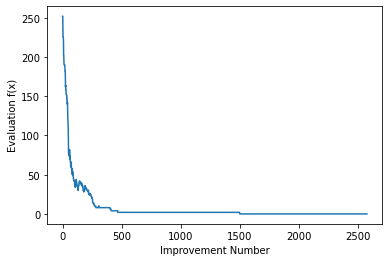

[[2 6 9 9 8 1 3 5 2]
 [7 6 1 1 7 8 3 8 4]
 [3 3 8 5 1 5 2 9 9]
 [6 5 5 1 8 5 4 3 8]
 [7 4 6 4 5 7 6 1 5]
 [4 6 2 7 2 6 8 2 8]
 [3 9 1 7 9 7 2 4 3]
 [7 2 9 1 4 5 8 6 3]
 [6 4 4 9 1 2 9 7 3]]
2
[[2 7 8 1 8 8 3 6 2]
 [2 6 2 8 7 1 8 8 4]
 [9 3 6 5 1 6 2 3 9]
 [4 2 9 1 7 5 4 5 8]
 [5 9 7 5 1 4 9 2 3]
 [4 3 2 7 9 6 5 3 6]
 [3 4 1 8 7 7 6 4 5]
 [7 2 6 9 4 5 1 6 5]
 [9 9 4 1 1 3 7 8 3]]
2
[[2 7 8 4 8 3 3 1 9]
 [2 6 8 8 7 1 1 8 4]
 [6 3 3 5 2 7 2 8 9]
 [7 2 5 1 6 5 4 7 8]
 [9 2 5 7 5 5 8 1 3]
 [4 9 2 7 3 6 9 1 4]
 [3 6 1 2 9 7 9 4 4]
 [7 2 9 6 4 6 3 6 1]
 [5 8 4 5 1 5 6 9 3]]
2
[[2 9 6 2 8 5 3 5 5]
 [1 6 6 9 7 1 3 8 4]
 [4 3 8 5 3 5 2 6 9]
 [7 7 5 1 2 5 4 6 8]
 [8 1 5 4 3 9 7 1 7]
 [4 6 2 7 8 6 8 1 3]
 [3 8 1 8 9 7 1 4 4]
 [7 2 9 3 4 5 7 6 2]
 [9 2 4 6 1 2 9 9 3]]
4
[[2 5 9 6 8 1 3 9 2]
 [9 6 1 3 7 2 5 8 4]
 [1 3 9 5 7 6 2 3 9]
 [8 8 4 1 1 5 4 6 8]
 [3 6 9 8 2 7 2 1 8]
 [4 1 2 7 8 6 9 3 4]
 [3 5 1 7 7 7 9 4 2]
 [7 2 6 3 4 5 7 6 5]
 [8 9 4 5 1 6 4 5 3]]
2
[[2 9 5 9 8 5 3 2 2]
 [9 6 1 1 7 1 8 8 4

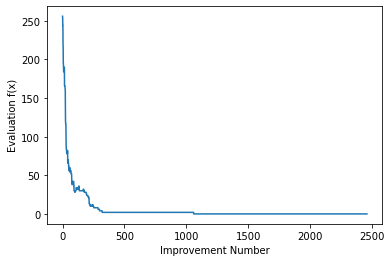

[[3 4 6 6 4 3 9 3 7]
 [9 8 1 4 2 5 1 8 7]
 [1 7 6 7 9 5 2 2 6]
 [1 4 7 9 3 4 8 7 2]
 [5 5 8 5 8 2 7 4 1]
 [4 6 5 5 2 7 6 1 9]
 [9 2 1 1 9 8 6 8 1]
 [8 3 4 6 5 9 3 4 3]
 [5 6 7 2 3 2 3 8 9]]
0


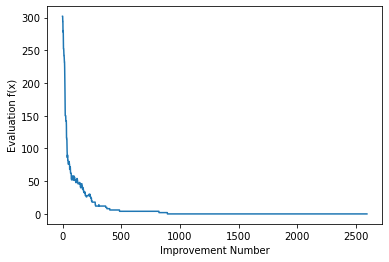

[[2 3 7 5 5 9 6 4 4]
 [1 6 8 4 1 4 5 7 9]
 [4 6 8 9 6 2 7 1 2]
 [7 7 4 5 3 2 7 8 2]
 [5 3 3 6 8 3 9 7 1]
 [9 4 3 1 8 9 3 3 5]
 [2 5 5 2 6 7 1 9 8]
 [7 3 1 9 2 8 6 4 5]
 [8 8 6 4 6 1 1 2 9]]
0


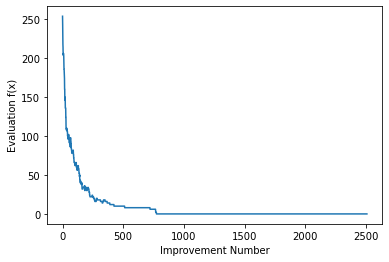

[[8 2 5 8 1 6 7 4 4]
 [7 4 4 4 9 3 1 8 5]
 [4 9 2 7 5 2 8 3 5]
 [7 1 9 1 4 2 6 8 7]
 [4 5 3 2 7 8 9 4 3]
 [1 6 9 9 3 9 2 3 3]
 [3 5 2 7 8 6 7 6 1]
 [6 6 5 6 3 8 2 1 8]
 [5 7 6 1 5 1 2 9 9]]
2
[[7 2 6 8 1 6 7 4 4]
 [7 3 2 9 9 3 1 7 4]
 [8 9 1 3 4 2 8 5 5]
 [3 3 9 1 4 4 6 8 7]
 [4 5 6 2 6 8 9 2 3]
 [1 6 8 8 3 9 2 4 4]
 [3 5 2 7 5 9 7 6 1]
 [7 5 5 6 8 3 2 1 8]
 [5 7 6 1 5 1 2 9 9]]
2
[[8 2 4 8 1 9 7 4 2]
 [7 2 4 5 8 3 1 9 6]
 [6 9 3 3 6 2 8 3 5]
 [2 3 9 5 4 1 6 8 7]
 [4 7 4 2 8 8 8 1 3]
 [1 6 9 7 3 7 2 5 5]
 [3 5 2 7 4 9 7 6 1]
 [9 4 5 6 6 5 1 1 8]
 [4 7 6 2 5 1 3 9 9]]
8
[[6 2 5 8 1 8 7 4 4]
 [7 3 3 8 9 3 1 6 5]
 [6 9 4 3 3 2 8 5 5]
 [4 2 9 1 4 4 6 8 7]
 [4 8 2 2 7 8 9 2 3]
 [1 6 9 9 3 7 2 5 3]
 [3 4 2 7 8 5 9 6 1]
 [7 4 5 6 5 7 2 1 8]
 [6 7 6 1 5 1 1 9 9]]
4
[[6 2 5 8 1 8 7 4 4]
 [7 6 3 8 9 3 1 4 4]
 [5 9 2 1 5 2 8 8 5]
 [6 1 9 3 4 1 6 8 7]
 [4 5 4 2 8 8 9 2 3]
 [1 6 9 7 3 9 2 5 3]
 [3 7 2 7 7 6 5 6 2]
 [9 2 5 6 3 7 4 1 8]
 [4 7 6 3 5 1 1 9 9]]
4
[[9 2 4 8 1 6 7 4 4]
 [7 3 3 9 9 3 1 5 5

KeyboardInterrupt: 

In [206]:
for sudoku in sudoku_set:
    fixed = count_fixed(sudoku)
    sudoku = fill_sudoku_randomly(sudoku)
    
    score = 1
    while score != 0:
        best, score, scores = simulated_annealing(sudoku, temp, sudoku_energy, annealing_scheme099, change_random_places_sudoku, 2000, 10, False)
        best = np.reshape(best, (int(np.sqrt(len(best))), int(np.sqrt(len(best)))))
        print(best)
        print(score)

    pyplot.plot(scores)
    pyplot.xlabel('Improvement Number')
    pyplot.ylabel('Evaluation f(x)')
    pyplot.show()

In [203]:
sudoku = sudoku_set[11]

fixed = count_fixed(sudoku)
sudoku = fill_sudoku_randomly(sudoku)

score = 1
while score != 0:
    best, score, scores = simulated_annealing(sudoku, temp, sudoku_energy, annealing_scheme099, change_random_places_sudoku, 2000, 10, False)
    best = np.reshape(best, (int(np.sqrt(len(best))), int(np.sqrt(len(best)))))
    print(best)
    print(score)

pyplot.plot(scores)
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

NameError: name 'sudoku_set' is not defined